# Syntactic Analysis

In this last part (part-4), we take results of part-3 - our Sentiment Analysis - to another level by looking more deeply into the text passages of abstracts.

We plan to apply the **following techniques**:
- Sentence Segmentation: Analyse Dep and NER  per sentence
- Apply Dependency Parser and get subject + attributes + object
- Apply NER to recognize specialties within the abstract
- Visualite Dep and NER

**Methodological Approach**
1. Analyze Titles via Dependency Parser
2. Analyze Titles via NER
3. Summarize Results

In Case results are not indicative for further interpretation repeat step 1 to 3 for Abstracts (Sentence segmentation required!)

## 1) Data Preprocessing

In [2]:
# Import packages
import pandas as pd

# Load df
df_pol = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portfolio_Projects/03_PhD_Analysen/04_NLP_CG_VBM/Rohdaten_0603.csv", sep = ";", 
                     index_col = 0, error_bad_lines=False)

# View first rows
df_pol.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Journal,Title,Year,Abstract
No.,,,,
1,Management Review Quarterly,Determinants and effects of sustainable CEO co...,2019,Sustainability-oriented CEO compensation is be...
2,Management Review Quarterly,A governance puzzle to be solved? A systematic...,2020,"To address global sustainability challenges, a..."
3,Journal of Economics and Finance,The analysis of corporate governance policy an...,2016,The main purpose of this study is to investiga...
4,Journal of Economics and Finance,The impact of governance characteristics on th...,2014,The study examines the relationship between th...
5,Journal of Economics and Finance,Board independence and market reactions around...,2011,This study focuses on whether board independen...


In [3]:
# Import TextBlob
from textblob import TextBlob

# Create "Polarity"-column
df_pol["Polarity"] = [TextBlob(abstract).sentiment.polarity for abstract in df_pol["Abstract"]]

# View first rows
df_pol.head()

,Journal,Title,Year,Abstract,Polarity
No.,,,,,
1,Management Review Quarterly,Determinants and effects of sustainable CEO co...,2019,Sustainability-oriented CEO compensation is be...,0.018333
2,Management Review Quarterly,A governance puzzle to be solved? A systematic...,2020,"To address global sustainability challenges, a...",0.016667
3,Journal of Economics and Finance,The analysis of corporate governance policy an...,2016,The main purpose of this study is to investiga...,0.174510
4,Journal of Economics and Finance,The impact of governance characteristics on th...,2014,The study examines the relationship between th...,0.034519
5,Journal of Economics and Finance,Board independence and market reactions around...,2011,This study focuses on whether board independen...,-0.001667


In [4]:
# Define category-function
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [5]:
# Perform category-function for each polarity score
df_pol['Category'] = [getTextAnalysis(pol) for pol in df_pol["Polarity"]]

# View first rows
df_pol.head()

,Journal,Title,Year,Abstract,Polarity,Category
No.,,,,,,
1,Management Review Quarterly,Determinants and effects of sustainable CEO co...,2019,Sustainability-oriented CEO compensation is be...,0.018333,Positive
2,Management Review Quarterly,A governance puzzle to be solved? A systematic...,2020,"To address global sustainability challenges, a...",0.016667,Positive
3,Journal of Economics and Finance,The analysis of corporate governance policy an...,2016,The main purpose of this study is to investiga...,0.174510,Positive
4,Journal of Economics and Finance,The impact of governance characteristics on th...,2014,The study examines the relationship between th...,0.034519,Positive
5,Journal of Economics and Finance,Board independence and market reactions around...,2011,This study focuses on whether board independen...,-0.001667,Negative


## 2) Dependency Tree Visualization and Attribute Determination


**a) Selection of top 50 positive and negative abstracts**

Since most articles are close to polarity values of zero, we consider the most extreme ones by selecting positive categories, sort them and take the `.head(50)` as new df. Same applies for negative abstracts

In [6]:
# Subset df_pol for top 50 Articles with highest positive polarity

# Filter for positive abstracts
df_pol_pos = df_pol[df_pol["Category"] == "Positive"]

# Save 50 most extreme ones
df_pos = df_pol_pos.sort_values("Polarity", ascending = False).head(50)

# View first rows
df_pos.head()


,Journal,Title,Year,Abstract,Polarity,Category
No.,,,,,,
46,International Journal of Disclosure And Govern...,Impact of corporate governance regulations on ...,2013,Effective corporate governance helps build vib...,0.369167,Positive
522,Journal of Business Economics and Management,Ownership Structure and Board Effectiveness as...,2011,This study analyzes the influence of ownership...,0.332500,Positive
373,Strategic Management Journal,"Competition, governance, and relationship‐spec...",2013,This paper uses biform games to examine the en...,0.332121,Positive
85,Journal of Management and Governance,Board characteristics and the value relevance ...,2017,This study investigates whether board characte...,0.331471,Positive
99,Journal of Management and Governance,Power and trust in board–CEO relationships,2013,In this paper we develop and test a theoretica...,0.321875,Positive


In [7]:
# Subset df_pol for top 50 Articles with highest negative polarity

# Filter for negative abstracts
df_pol_neg = df_pol[df_pol["Category"] == "Negative"]

# Save 50 most extreme ones
df_neg = df_pol_neg.sort_values("Polarity", ascending = True).head(50)

# View first rows
df_neg.head()

,Journal,Title,Year,Abstract,Polarity,Category
No.,,,,,,
86,Journal of Management and Governance,Conflict in the boardroom: a participant obser...,2017,We develop a conflict-oriented model of board ...,-0.180952,Negative
308,British Journal of Management,A Contingency Model of Boards of Directors and...,2012,This study asserts that the effects of board c...,-0.128571,Negative
81,Journal of Management and Governance,Dual class shares board of directors’ effectiv...,2017,This study aims to identify whether a relation...,-0.102331,Negative
256,Corporate Governance: An International Review,Do Shareholder Coalitions Modify the Dominant ...,2015,We examine the effect of shareholder coalition...,-0.101562,Negative
412,Managerial and Decision Economics,Corporate governance and firm performance rela...,2019,We examine the impact of corporate governance ...,-0.085714,Negative


**b) nlp-Transformation of "Title and "Abstract**

Now, we two dataframes comprising positive and negative abstracts. A first step is almost always to enrich data by various text elements. In spacy, we do this by performing an nlp-transformation and thus creating spaCy-documents.

In [ ]:
# POSITIVE ARTICELS ############################################################
# Import library and package
import spacy
!pip install python -m spacy download en
nlp = spacy.load("en_core_web_sm")

In [10]:
# Perform nlp-transformation
df_pos["nlp_title"] = df_pos["Title"]
df_pos["nlp_title"] = [nlp(title) for title in df_pos["Title"]]
df_pos["nlp_abstract"] = [nlp(abstract) for abstract in df_pos["Abstract"]]

# View first rows
df_pos.head()

,Journal,Title,Year,Abstract,Polarity,Category,nlp_title,nlp_abstract
No.,,,,,,,,
46,International Journal of Disclosure And Govern...,Impact of corporate governance regulations on ...,2013,Effective corporate governance helps build vib...,0.369167,Positive,"(Impact, of, corporate, governance, regulation...","(Effective, corporate, governance, helps, buil..."
522,Journal of Business Economics and Management,Ownership Structure and Board Effectiveness as...,2011,This study analyzes the influence of ownership...,0.332500,Positive,"(Ownership, Structure, and, Board, Effectivene...","(This, study, analyzes, the, influence, of, ow..."
373,Strategic Management Journal,"Competition, governance, and relationship‐spec...",2013,This paper uses biform games to examine the en...,0.332121,Positive,"(Competition, ,, governance, ,, and, relations...","(This, paper, uses, biform, games, to, examine..."
85,Journal of Management and Governance,Board characteristics and the value relevance ...,2017,This study investigates whether board characte...,0.331471,Positive,"(Board, characteristics, and, the, value, rele...","(This, study, investigates, whether, board, ch..."
99,Journal of Management and Governance,Power and trust in board–CEO relationships,2013,In this paper we develop and test a theoretica...,0.321875,Positive,"(Power, and, trust, in, board, –, CEO, relatio...","(In, this, paper, we, develop, and, test, a, t..."


In [ ]:
# NEGATIVE ARTICELS ############################################################
# Import library and package
import spacy
python -m spacy download en
nlp = spacy.load("en_core_web_sm")

In [11]:
# Perform nlp-transformation
df_neg["nlp_title"] = df_neg["Title"]
df_neg["nlp_title"] = [nlp(title) for title in df_neg["Title"]]
df_neg["nlp_abstract"] = [nlp(abstract) for abstract in df_neg["Abstract"]]

# View first rows
df_neg.head()

,Journal,Title,Year,Abstract,Polarity,Category,nlp_title,nlp_abstract
No.,,,,,,,,
86,Journal of Management and Governance,Conflict in the boardroom: a participant obser...,2017,We develop a conflict-oriented model of board ...,-0.180952,Negative,"(Conflict, in, the, boardroom, :, a, participa...","(We, develop, a, conflict, -, oriented, model,..."
308,British Journal of Management,A Contingency Model of Boards of Directors and...,2012,This study asserts that the effects of board c...,-0.128571,Negative,"(A, Contingency, Model, of, Boards, of, Direct...","(This, study, asserts, that, the, effects, of,..."
81,Journal of Management and Governance,Dual class shares board of directors’ effectiv...,2017,This study aims to identify whether a relation...,-0.102331,Negative,"(Dual, class, shares, board, of, directors, ’,...","(This, study, aims, to, identify, whether, a, ..."
256,Corporate Governance: An International Review,Do Shareholder Coalitions Modify the Dominant ...,2015,We examine the effect of shareholder coalition...,-0.101562,Negative,"(Do, Shareholder, Coalitions, Modify, the, Dom...","(We, examine, the, effect, of, shareholder, co..."
412,Managerial and Decision Economics,Corporate governance and firm performance rela...,2019,We examine the impact of corporate governance ...,-0.085714,Negative,"(Corporate, governance, and, firm, performance...","(We, examine, the, impact, of, corporate, gove..."


**c) Dependency Trees for positive Titles**

We aim to leverage `spaCy` again:
-  "... spaCy provides syntactic parsing to show word usage, thus creating a dependency tree..."

- "... visualizing these relationships reveals an even more comprehensive story.  First load a submodule called displaCy to help with the visualization... ask displaCy to render the dependency tree..."

In [18]:
# Use Displacy to detect dependencies
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

# Because the syntactic relations form a tree, every word has exactly one head.
# Display dependency structure within each title
for title in df_pos["Title"]:
  nlp_title = nlp(title)
  option = {"compact": False, 'distance': 100}
  displacy.render(nlp_title, style = 'dep', jupyter = True, options = option)

**d) Dependency Trees for negative Titles**

In [20]:
# Use displaCy to detect dependencies
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

# Because the syntactic relations form a tree, every word has exactly one head.
# Display dependency structure within each title
for title in df_neg["Title"]:
  nlp_title = nlp(title)
  option = {"compact": False, 'distance': 100}
  displacy.render(nlp_title, style = 'dep', jupyter = True, options = option)

In [19]:
# Get some explanations for the acronyms
print(f"pobj = {spacy.explain('pobj')}")
print(f"appos = {spacy.explain('appos')}")
print(f"compound = {spacy.explain('compound')}")
print(f"det = {spacy.explain('det')}")
print(f"prep = {spacy.explain('prep')}")
print(f"cc = {spacy.explain('cc')}\n")

print(f"amod = {spacy.explain('amod')}")
print(f"nmod = {spacy.explain('nmod')}")
print(f"dobj = {spacy.explain('dobj')}")
print(f"dep = {spacy.explain('dep')}")
print(f"conj = {spacy.explain('conj')}")
print(f"numod = {spacy.explain('nummod')}")
print(f"npadvmod = {spacy.explain('npadvmod')}")
print(f"advmod = {spacy.explain('advmod')}")
print(f"aux = {spacy.explain('aux')}")
print(f"nsubj = {spacy.explain('nsubj')}")


pobj = object of preposition
appos = appositional modifier
compound = compound
det = determiner
prep = prepositional modifier
cc = coordinating conjunction

amod = adjectival modifier
nmod = modifier of nominal
dobj = direct object
dep = unclassified dependent
conj = conjunct
numod = numeric modifier
npadvmod = noun phrase as adverbial modifier
advmod = adverbial modifier
aux = auxiliary
nsubj = nominal subject


## 3) Part-Of-Speech Analysis

In this analysis, we make use of the nlp-objects. As we mentioned above, nlp-objects enrich text data. Here, we access the POS-tag of nlp-objects and assess quantitatively how positive and negative abstract differ by listing most common adjectives and nouns in a horizontal barchart.

### 3a) PoS-Analysis: Adjectives

**a) Create new column where abstracts are characterized by nlp-object**

In [22]:
# Create nlp-objects of "Abstract"
df_pos["nlp_abstract"] = [nlp(abstract) for abstract in df_pos["Abstract"]]
df_neg["nlp_abstract"] = [nlp(abstract) for abstract in df_neg["Abstract"]]

**b) Customize stop word list**

In [23]:
# Append corporate governance stop words in stop_words list
customize_stop_words = ["corporate", "governance", "financial", "firm", "empirical", "theoretical"]
for word in customize_stop_words:
    nlp.vocab[word].is_stop = True

**c) Filter abstracts for tokens that are recognized as adjectives (token.pos_ == "ADJ")**

In [24]:
# Lowercasing token for each abstract in "nlp_abstract" and take only "ADJ" (adjectives), alphabetical tokens and non-stopword tokens
pos_adj = [token.text.lower() for abstract in df_pos["nlp_abstract"] for token in abstract if token.pos_ == "ADJ" and token.is_alpha == True and token.is_stop == False]
neg_adj = [token.text.lower() for abstract in df_neg["nlp_abstract"] for token in abstract if token.pos_ == "ADJ" and token.is_alpha == True and token.is_stop == False]


**c) Create Bag-of-Words**

Determine 10 most common adjectives within the 10 most positive / most negative journal abstracts

In [25]:
# Import Counter()
from collections import Counter

# Build BoW of 10 most common adjectives
common_pos_adj = Counter(pos_adj).most_common(10)
common_neg_adj = Counter(neg_adj).most_common(10)

# View them
print(common_pos_adj)
print(common_neg_adj)

[('effective', 25), ('significant', 18), ('positive', 16), ('important', 16), ('better', 15), ('higher', 14), ('best', 13), ('managerial', 12), ('greater', 11), ('good', 11)]
[('negative', 18), ('likely', 14), ('foreign', 13), ('different', 12), ('poor', 11), ('executive', 10), ('positive', 10), ('organizational', 10), ('social', 10), ('outside', 9)]


**d) Visualizing BoW**

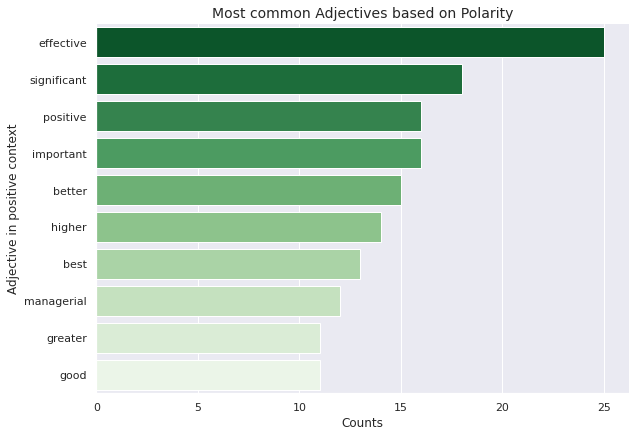

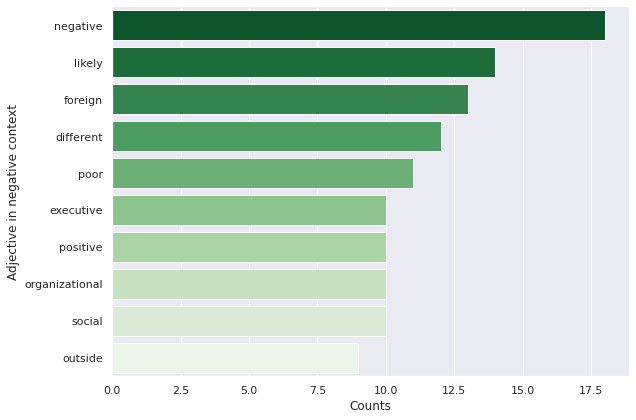

In [32]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns

# Build DataFrame
df_common_pos_adj = pd.DataFrame(common_pos_adj, columns = ["Adjective in positive context", "Counts"])
df_common_neg_adj = pd.DataFrame(common_neg_adj, columns = ["Adjective in negative context", "Counts"])

# Setup figure layout
sns.set_style("darkgrid")
sns.set_palette(palette = "Greens_r", n_colors = 10)
sns.set_context("notebook")

# Create Plot of positive abstracts
common_pos_adj_plot = sns.catplot(data = df_common_pos_adj, x = "Counts", y = "Adjective in positive context", kind = "bar", height = 6, aspect = 1.5)

# Add Annotations
plt.title("Most common Adjectives based on Polarity", fontsize = 14)

# Create plot of negative abstracts
common_neg_adj_plot = sns.catplot(data = df_common_neg_adj, x = "Counts", y = "Adjective in negative context", kind = "bar", height = 6, aspect = 1.5)


To further improve analysis, we might consider the following
- Expand analysis to include nouns that are used by adjectives
- Include negation terms using NegspaCy
- Expand POS-Analysis to all positive / negative abstracts

### 3b) PoS-Analysis: Nouns

Calculate and Visualize most common nouns within abstracts of top 10 positive / negative abstracts

**a) Customize stop words**

The customized stop word list depends on the results given in the last step. If the respective word is not useful to derive further meaning, it will be added to the **`customize_stop_words`** list

In [33]:
# Append corporate governance stopwords to stop_word list

# Define cg stopwords
customize_stop_words = ["study", "results", "firms", "family", "findings", "research", "board", "ceo", "ceos", "CEO", "CEOs", "Board", "director", 
                        "Director", "Boards", "boards", "directors", "Directors", "agency", "Agency", "Theory", "theory", "Level", "level"
                        "data", "model", "literature", "Data", "Model", "Literature", "Analysis", "DATA", "analysis"]

# Append cg stopwords
for word in customize_stop_words:
    nlp.vocab[word].is_stop = True

**b) Create positive noun list which is:**
- POS = "NOUN
- is alphabetical
- is not included in the stop words list

In [34]:
# Filter only tokens that are nouns, alphabetical and are not contained in the stopword list
pos_noun = [token.text.lower() for abstract in df_pos["nlp_abstract"] for token in abstract if token.pos_ == "NOUN" and token.is_alpha == True and token.is_stop == False]
neg_noun = [token.text.lower() for abstract in df_neg["nlp_abstract"] for token in abstract if token.pos_ == "NOUN" and token.is_alpha == True and token.is_stop == False]

**c) Lemmatize words**

We want to remove noise in the text in order to create more detailed results based on a cleaner text

In [35]:
# Import library and packages
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Initialize Lemmatizer
wnl = WordNetLemmatizer()

# Lemmatize words in pos_noun and neg_noun list
pos_noun = [wnl.lemmatize(word) for word in pos_noun]
neg_noun = [wnl.lemmatize(word) for word in neg_noun]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


**d) Build Bag-of-Words (BoW)**

In [36]:
# Import Counter()
from collections import Counter

# Build BoW
common_pos_noun = Counter(pos_noun).most_common(10)
common_neg_noun = Counter(neg_noun).most_common(10)

# View BoW
print(common_pos_noun)
print(common_neg_noun)

[('performance', 45), ('market', 33), ('ownership', 33), ('level', 33), ('effect', 32), ('decision', 31), ('value', 28), ('practice', 26), ('investment', 26), ('power', 25)]
[('performance', 74), ('risk', 45), ('effect', 42), ('relationship', 40), ('ownership', 35), ('shareholder', 24), ('cost', 19), ('structure', 18), ('diversity', 17), ('data', 17)]


**e) Visualizing BoW of Nouns**

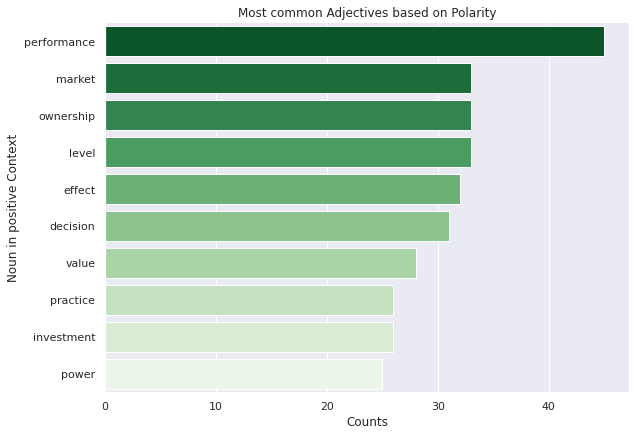

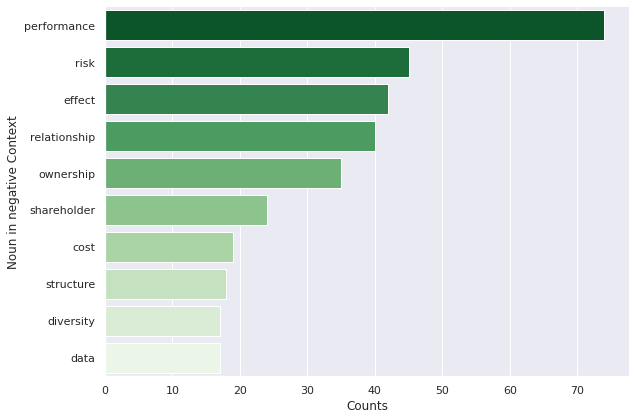

In [37]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns

# Build DataFrame
df_common_posnoun = pd.DataFrame(common_pos_noun, columns = ["Noun in positive Context", "Counts"])
df_common_negnoun = pd.DataFrame(common_neg_noun, columns = ["Noun in negative Context", "Counts"])

# Setup figure layout
sns.set_style("darkgrid")
sns.set_palette(palette = "Greens_r", n_colors = 10)
sns.set_context("notebook")

# Create plot of positive abstracts
common_pos_noun_plot = sns.catplot(data = df_common_posnoun, x = "Counts", y = "Noun in positive Context", kind = "bar", height = 6, aspect = 1.5)

# Add annotations
plt.title("Most common Adjectives based on Polarity")

# Create plot of negative abstracts
common_neg_noun_plot = sns.catplot(data = df_common_negnoun, x = "Counts", y = "Noun in negative Context", kind = "bar", height = 6, aspect = 1.5)

### 3c) Modifier-Noun-Analysis

The Modifier-Noun Analysis allows to search for adjectives that describe specific nouns, e.g. corporate governance, diversity, risk taking, ... for both positive and negative abstracts.

Comparing the nouns and adjectives by sentiment certainly adds insight, but we probably care about the specific adjectives used to characterize each noun even more. That is, how do researchers describe Corporate governance, CEO duality, etc.? What are they saying about the firm performance? Navigating spaCy’s dependency tree provides these valuable details, as shown above.

**`pprint`** module
The pprint module has some functions which are helpful to enhance the print() of dictionaries and get a cleaner display of the items in the dictionary. The two functions are **`pprint()`** and **`pformat()`**.

In [38]:
# Import libraries
from spacy.symbols import amod
from pprint import pprint

In [39]:
# Subset positive dataframe
pos_abstracts = df_pos[["Journal", "Title", "Abstract", "Year", "Polarity"]]

# View first rows
pos_abstracts.head()


,Journal,Title,Abstract,Year,Polarity
No.,,,,,
46,International Journal of Disclosure And Govern...,Impact of corporate governance regulations on ...,Effective corporate governance helps build vib...,2013,0.369167
522,Journal of Business Economics and Management,Ownership Structure and Board Effectiveness as...,This study analyzes the influence of ownership...,2011,0.332500
373,Strategic Management Journal,"Competition, governance, and relationship‐spec...",This paper uses biform games to examine the en...,2013,0.332121
85,Journal of Management and Governance,Board characteristics and the value relevance ...,This study investigates whether board characte...,2017,0.331471
99,Journal of Management and Governance,Power and trust in board–CEO relationships,In this paper we develop and test a theoretica...,2013,0.321875


In [41]:
# Subset negative dataframe
neg_abstracts = df_neg[["Journal", "Title", "Abstract", "Year", "Polarity"]]

# View first rows
neg_abstracts.head()

,Journal,Title,Abstract,Year,Polarity
No.,,,,,
86,Journal of Management and Governance,Conflict in the boardroom: a participant obser...,We develop a conflict-oriented model of board ...,2017,-0.180952
308,British Journal of Management,A Contingency Model of Boards of Directors and...,This study asserts that the effects of board c...,2012,-0.128571
81,Journal of Management and Governance,Dual class shares board of directors’ effectiv...,This study aims to identify whether a relation...,2017,-0.102331
256,Corporate Governance: An International Review,Do Shareholder Coalitions Modify the Dominant ...,We examine the effect of shareholder coalition...,2015,-0.101562
412,Managerial and Decision Economics,Corporate governance and firm performance rela...,We examine the impact of corporate governance ...,2019,-0.085714


Verify that top 50 positive and negative abstracts are considered

In [42]:
# View shape 
print(pos_abstracts.shape)
print(neg_abstracts.shape)

(50, 5)
(50, 5)


**Use spaCy's `pipe` method in order to process multiple documents in one go**

In [43]:
# Create nlp-objects
pos_abstracts["nlp_abstract"] = list(nlp.pipe(pos_abstracts["Abstract"]))

# View first rows
pos_abstracts.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Journal,Title,Abstract,Year,Polarity,nlp_abstract
No.,,,,,,
46,International Journal of Disclosure And Govern...,Impact of corporate governance regulations on ...,Effective corporate governance helps build vib...,2013,0.369167,"(Effective, corporate, governance, helps, buil..."
522,Journal of Business Economics and Management,Ownership Structure and Board Effectiveness as...,This study analyzes the influence of ownership...,2011,0.332500,"(This, study, analyzes, the, influence, of, ow..."
373,Strategic Management Journal,"Competition, governance, and relationship‐spec...",This paper uses biform games to examine the en...,2013,0.332121,"(This, paper, uses, biform, games, to, examine..."
85,Journal of Management and Governance,Board characteristics and the value relevance ...,This study investigates whether board characte...,2017,0.331471,"(This, study, investigates, whether, board, ch..."
99,Journal of Management and Governance,Power and trust in board–CEO relationships,In this paper we develop and test a theoretica...,2013,0.321875,"(In, this, paper, we, develop, and, test, a, t..."


In [ ]:
# Create nlp-objects
neg_abstracts["nlp_abstract"] = list(nlp.pipe(neg_abstracts["Abstract"]))

# View first rows
neg_abstracts.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Journal,Title,Abstract,Year,Polarity,nlp_abstract
No.,,,,,,
98,Journal of Management and Governance,Conflict in the boardroom: a participant obser...,We develop a conflict-oriented model of board ...,2017,-0.180952,"(We, develop, a, conflict, -, oriented, model,..."
320,British Journal of Management,A Contingency Model of Boards of Directors and...,This study asserts that the effects of board c...,2012,-0.128571,"(This, study, asserts, that, the, effects, of,..."
93,Journal of Management and Governance,Dual class shares board of directors’ effectiv...,This study aims to identify whether a relation...,2017,-0.102331,"(This, study, aims, to, identify, whether, a, ..."
268,Corporate Governance: An International Review,Do Shareholder Coalitions Modify the Dominant ...,We examine the effect of shareholder coalition...,2015,-0.101562,"(We, examine, the, effect, of, shareholder, co..."
424,Managerial and Decision Economics,Corporate governance and firm performance rela...,We examine the impact of corporate governance ...,2019,-0.085714,"(We, examine, the, impact, of, corporate, gove..."


**c) Analyze adjective modifiers per noun of interest**

For a given noun of interest, extract each of the adjectival modifiers that are among its children tokens. Consider an example pandas series of spaCy documents (**`series`**) along with a particular noun string (**`noun_str`**). A simple way to produce a list of adjectives modifying this noun follows:

In [47]:
# Create a function that allows to analyze nouns and how they are described
def get_amods(noun, series):
  '''
  This function appends adjectives to amod_list. 
  It selects tokens if their are nouns and 
  takes their child-tokens if their are modifiers.
  '''
  amod_list = []
  for abstract in series:
      for token in abstract:
          if (token.text) == noun:
              for child in token.children:
                  if child.dep == amod:
                      amod_list.append(child.text.lower())
  return sorted(amod_list)

# Function that gives insights about how 
def amods_by_sentiment(noun):
  '''
  This function gives insights in terms of how differently nouns are
  described depending on the positive / negative polarity.
  '''
  print(f"Adjectives describing {str.upper(noun)}:\n")
    
  print("POSITIVE:")
  pprint(get_amods(noun, pos_abstracts["nlp_abstract"]))
    
  print("\nNEGATIVE:")
  pprint(get_amods(noun, df_neg["nlp_abstract"]))

**`Nouns of interest (based on CountPlot):`**
- Corporate Governance
- Characteristics
- Performance
- Board
- Diversity
- Risk
- CEO

**For example: check adjective modifiers for "Board"**

In [ ]:
amods_by_sentiment("board")

Adjectives describing BOARD:

POSITIVE:
['better', 'existing', 'full']

NEGATIVE:
['active',
 'active',
 'active',
 'active',
 'functioning',
 'supervisory',
 'supervisory',
 'supervisory']


This function allows to specifically evaluate the description of a noun of interest. 

It can also be implemented in the context of:
- Competitor Analyses
- Social Media Analyses
- Trend Analyses
- etc.